### SpaceX Falcon 9 First Stage Landing Prediction

__Assignment: Exploring and Preparing Data__

##### Import Libraries and Define Auxiliary Functions
We will import the following libraries the lab

In [1]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
from matplotlib import pyplot
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

##### Exploratory Data Analysis
First, let's read the SpaceX dataset into a Pandas dataframe and print its summary

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(31.609716145833318, 0.5, 'Pay load Mass (kg)')

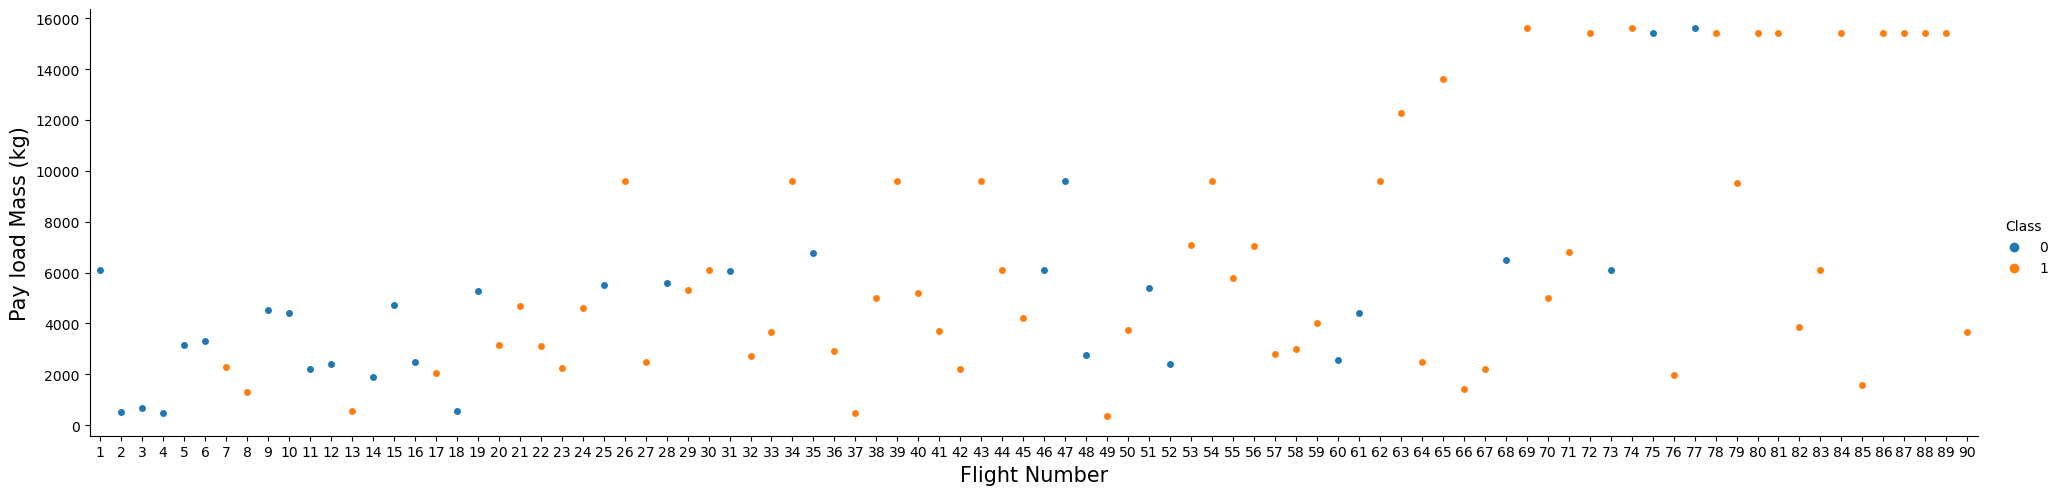

In [36]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("Flight Number",fontsize=15)
plt.ylabel("Pay load Mass (kg)",fontsize=15)

__Findings:__  
1. As the flight number increases, the first stage is more likely to land successfully.

2. The more massive the payload is, the less likely the first stage will return.

3. Different launch sites have different success rates: CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%.

##### TASK 1: Visualize the relationship between Flight Number and Launch Site
    
sns.catplot(y="FLightnumber", x="Launchsite}", hue="Class", data=df, aspect = 5) plt.xlabel("Flight Number",fontsize=20) plt.ylabel("Pay load Mass (kg)",fontsize=20) plt.show()

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


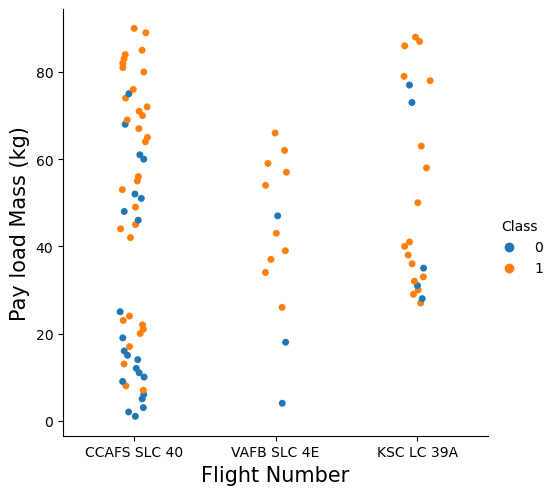

In [32]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="FlightNumber",x="LaunchSite",hue='Class',data=df, aspect=1)
plt.xlabel("Flight Number",fontsize=15)
plt.ylabel("Pay load Mass (kg)",fontsize=15)
plt.show()

__Findings:__

1. CCAFS LC-40: No strong relationship between flight number and success rate. Success appears consistent across various flight numbers.

2. KSC LC-39A: Similarly, no strong correlation between flight number and success rate. Success rates vary across flight numbers.

3. VAFB SLC 4E: Success rates appear consistent, regardless of flight number.

##### TASK 2: Visualize the relationship between Payload and Launch Site
    
We also want to observe if there is any relationship between launch sites and their payload mass.

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


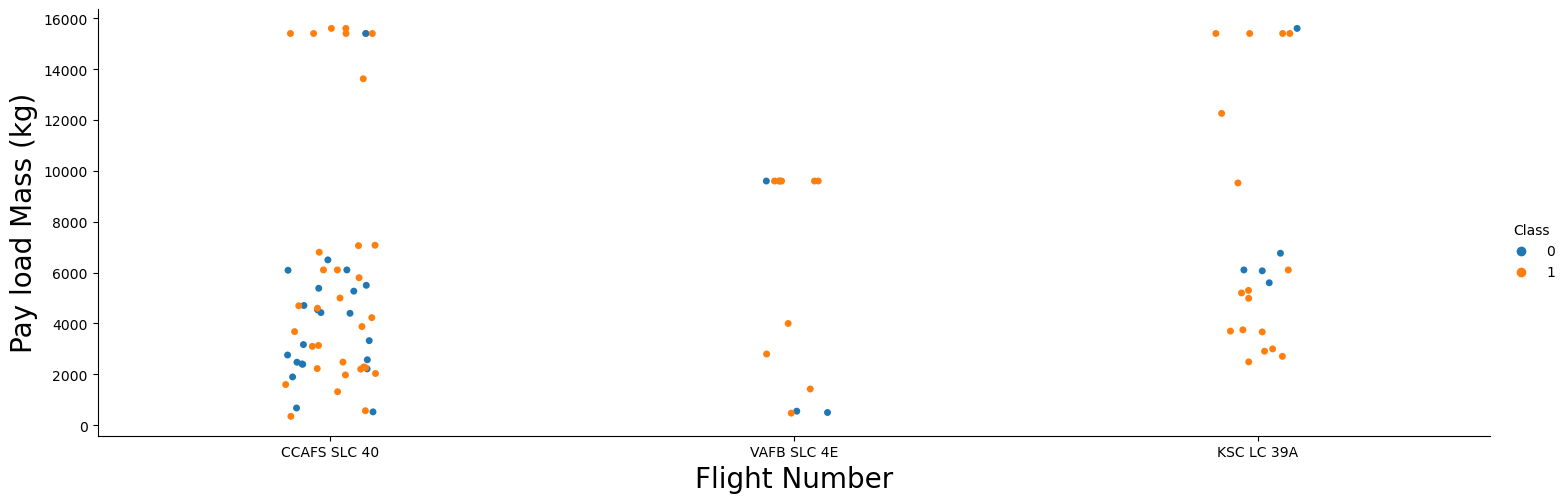

In [37]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

__Findings:__
    
1. VAFB-SLC: No rockets launched for heavy payload mass (greater than 10,000).

2. Other Launch Sites: Rockets launched for a range of payload masses.

3. The launch site affects payload capacity and handling.

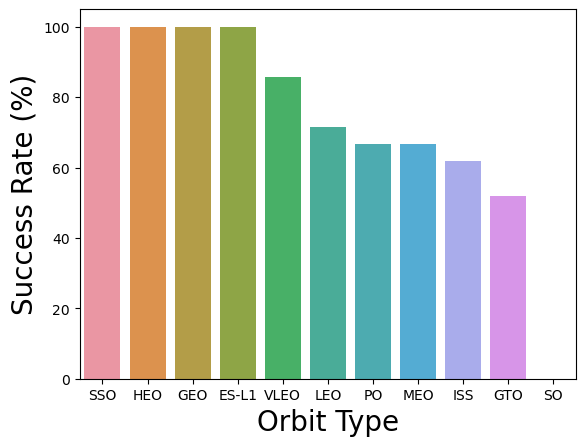

In [39]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit_success = df.groupby(['Orbit'])['Class'].aggregate(np.average).reset_index().sort_values(['Class','Orbit'], ascending=False)
orbit_success['Class'] = np.round(orbit_success['Class']*100, 2)
sns.barplot(x='Orbit', y='Class', data=orbit_success)
plt.ylabel("Success Rate (%)",fontsize=20)
plt.xlabel("Orbit Type",fontsize=20)
plt.show()

__Findings:__
    
1. SSE, HEO, GEO, ES-L1 Orbits: 100% success rates, indicating high reliability.

2. Other Orbit Types: Varying success rates, suggesting mission complexities.

##### TASK 4: Visualize the relationship between FlightNumber and Orbit type
For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


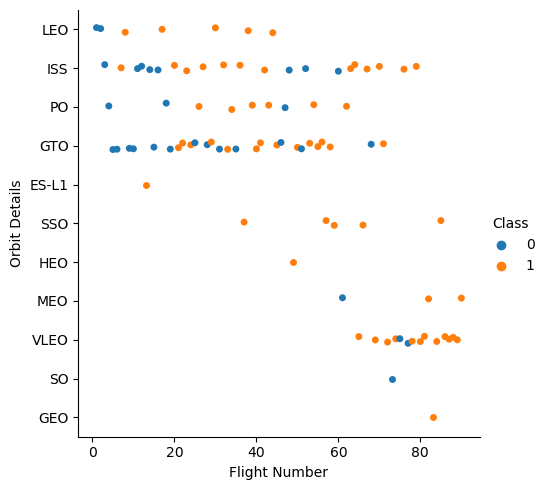

In [27]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='FlightNumber',y='Orbit',data=df,hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Details')
plt.show()

__Findings:__
    
1. LEO Orbit: Success appears correlated with the number of flights.

2. GTO Orbit: No clear relationship between flight number and success.

##### TASK 5: Visualize the relationship between Payload and Orbit type
Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


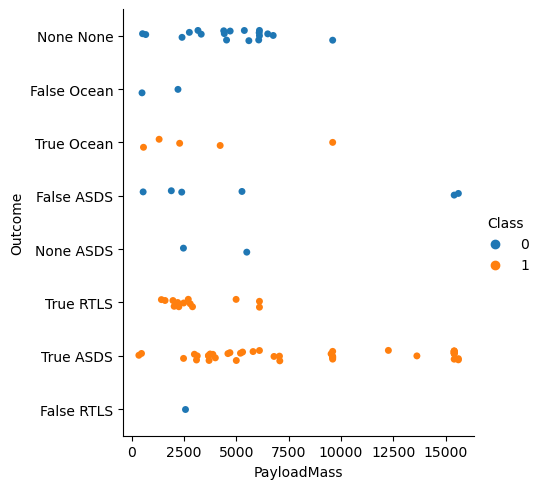

In [28]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

sns.catplot(x='PayloadMass',y='Outcome',data=df,hue='Class')
plt.xlabel('PayloadMass')
plt.ylabel('Outcome')
plt.show()

__Findings:__
    
1. PO, LEO, ISS Orbits: Higher payload mass corresponds to a more successful landing.

2. GTO Orbit: Payload mass does not clearly affect landing success.

##### TASK 6: Visualize the launch success yearly trend
You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

In [12]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [14]:
df['Date']=df['Date'].astype(str)

In [15]:
# A function to Extract years from the date 
year=[]
def Extract_year(df):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

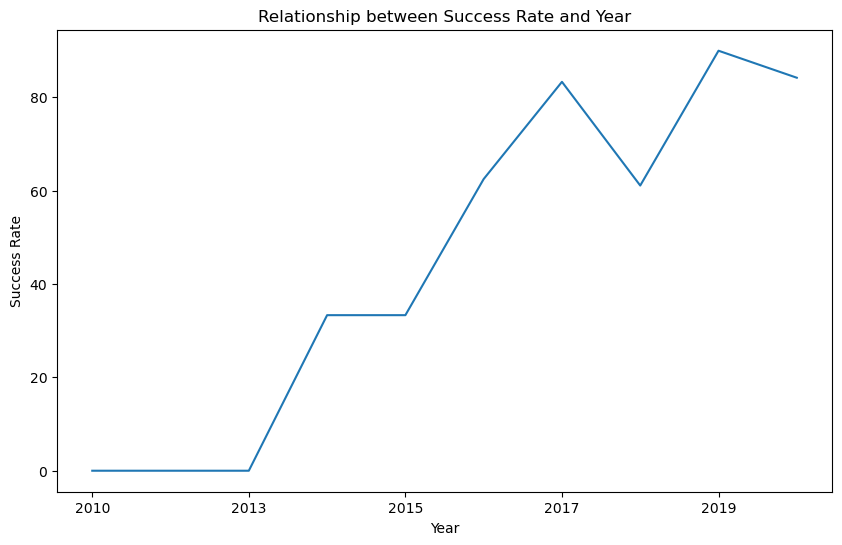

In [16]:
# Plotting a line chart with x axis to be the extracted year and y axis to be the success rate
Extract_year(df)
df['Year']=year
fig,ax=plt.subplots()
df_success1=df.groupby('Year')['Class'].mean()*100
df_success1.plot(kind='line', figsize=(10,6))
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Success Rate') # add y-label to the plot
plt.title('Relationship between Success Rate and Year') # add title to the plot

plt.show()

__Findings:__
    
1. 2013 to 2020: There is consistent increase in success rates.

2. Highlight: SpaceX's continual improvement in launch reliability.

##### Features Engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [17]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


##### TASK 7: Create dummy variables to categorical columns
    
Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [18]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot=pd.get_dummies(features, columns=['Orbit','LaunchSite', 'LandingPad', 'Serial'])
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False
86,87,15400.000000,3,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,True,False,False,False
87,88,15400.000000,6,True,True,True,5.0,5,False,False,...,False,False,False,True,False,False,False,False,False,False
88,89,15400.000000,3,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False


##### TASK 8: Cast all numeric columns to float64
    
Now that our features_one_hot dataframe only contains numbers cast the entire dataframe to variable type float64

In [19]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')

In [20]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)